In [43]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sadhik\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [44]:
df=pd.read_csv("amazon_co-ecommerce_sample.csv",index_col=0)
df

product_name  \
uniq_id                                                                               
eac7efa5dbd3d667f26eb3d3ab504464                              Hornby 2014 Catalogue   
b17540ef7e86e461d37f3ae58b7b72ac  FunkyBuys® Large Christmas Holiday Express Fes...   
348f344247b0c1a935b1223072ef9d8a  CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...   
e12b92dbb8eaee78b22965d2a9bbbd9f     HORNBY Coach R4410A BR Hawksworth Corridor 3rd   
e33a9adeed5f36840ccc227db4682a36  Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...   
...                                                                             ...   
44d6967f083825a5de36ad4865a65bcd  Batman 1966 TV Series Action Figures - The Rid...   
08f0747b6fc6687215ffb994c3a6fb32  Star Wars Costume, Kids Stormtrooper Costume S...   
bf6cc073f8f24e6e338190fa16f6ee9d        Defiance Lawkeeper Metal Badge Prop Replica   
cd783d0b8b44e631b9788b203eaaefae  Justice League of America Series 3 Green Lante...   
94d18e86e504bee1e392df7e5738b18a                  Star Wars 1/72 Y-Wing Starfighter   

                                             manufacturer   price  \
uniq_id                                                             
eac7efa5dbd3d667f26eb3d3ab504464                   Hornby   £3.42   
b17540ef7e86e461d37f3ae58b7b72ac                FunkyBuys  £16.99   
348f344247b0c1a935b1223072ef9d8a                      ccf   £9.99   
e12b92dbb8eaee78b22965d2a9bbbd9f                   Hornby  £39.99   
e33a9adeed5f36840ccc227db4682a36                   Hornby  £32.19   
...                                                   ...     ...   
44d6967f083825a5de36ad4865a65bcd                   Mattel  £22.95   
08f0747b6fc6687215ffb994c3a6fb32                Star Wars  £39.99   
bf6cc073f8f24e6e338190fa16f6ee9d  Olde Scotland Yard Ltd.  £43.99   
cd783d0b8b44e631b9788b203eaaefae                DC Comics  £49.81   
94d18e86e504bee1e392df7e5738b18a                   Bandai  £21.20   

                                 number_available_in_stock number_of_reviews  \
uniq_id                                                                        
eac7efa5dbd3d667f26eb3d3ab504464                     5 new                15   
b17540ef7e86e461d37f3ae58b7b72ac                       NaN                 2   
348f344247b0c1a935b1223072ef9d8a                     2 new                17   
e12b92dbb8eaee78b22965d2a9bbbd9f                       NaN                 1   
e33a9adeed5f36840ccc227db4682a36                       NaN                 3   
...                                                    ...               ...   
44d6967f083825a5de36ad4865a65bcd                     5 new                 3   
08f0747b6fc6687215ffb994c3a6fb32                       NaN                 1   
bf6cc073f8f24e6e338190fa16f6ee9d                     3 new                 1   
cd783d0b8b44e631b9788b203eaaefae                     3 new                 1   
94d18e86e504bee1e392df7e5738b18a                    31 new                11   

                                  number_of_answered_questions  \
uniq_id                                                          
eac7efa5dbd3d667f26eb3d3ab504464                           1.0   
b17540ef7e86e461d37f3ae58b7b72ac                           1.0   
348f344247b0c1a935b1223072ef9d8a                           2.0   
e12b92dbb8eaee78b22965d2a9bbbd9f                           2.0   
e33a9adeed5f36840ccc227db4682a36                           2.0   
...                                                        ...   
44d6967f083825a5de36ad4865a65bcd                           3.0   
08f0747b6fc6687215ffb994c3a6fb32                           3.0   
bf6cc073f8f24e6e338190fa16f6ee9d                           3.0   
cd783d0b8b44e631b9788b203eaaefae                           3.0   
94d18e86e504bee1e392df7e5738b18a                           3.0   

                                 average_review_rating  \
uniq_id                                                  
eac7efa5dbd3d667f26eb3d3a

In [45]:
df1=pd.DataFrame(df["customer_reviews"])
df1

customer_reviews
uniq_id                                                                            
eac7efa5dbd3d667f26eb3d3ab504464  Worth Buying For The Pictures Alone (As Ever) ...
b17540ef7e86e461d37f3ae58b7b72ac  Four Stars // 4.0 // 18 Dec. 2015 // By\n    \...
348f344247b0c1a935b1223072ef9d8a  **Highly Recommended!** // 5.0 // 26 May 2015 ...
e12b92dbb8eaee78b22965d2a9bbbd9f  I love it // 5.0 // 22 July 2013 // By\n    \n...
e33a9adeed5f36840ccc227db4682a36  Birthday present // 5.0 // 14 April 2014 // By...
...                                                                             ...
44d6967f083825a5de36ad4865a65bcd  Realistic // 5.0 // 31 Mar. 2014 // By\n    \n...
08f0747b6fc6687215ffb994c3a6fb32  ... what I see my grandson us going to have fu...
bf6cc073f8f24e6e338190fa16f6ee9d  Five Stars // 5.0 // 18 Dec. 2015 // By\n    \...
cd783d0b8b44e631b9788b203eaaefae  The best sculpt in a while // 5.0 // 13 May 20...
94d18e86e504bee1e392df7e5738b18a  Gold leader // 5.0 // 31 Aug. 2015 // By\n    ...

[10000 rows x 1 columns]

In [46]:
data= df1["customer_reviews"].str.split("//", n = 4, expand = True) 
data

0  \
uniq_id                                                                               
eac7efa5dbd3d667f26eb3d3ab504464     Worth Buying For The Pictures Alone (As Ever)    
b17540ef7e86e461d37f3ae58b7b72ac                                        Four Stars    
348f344247b0c1a935b1223072ef9d8a                           **Highly Recommended!**    
e12b92dbb8eaee78b22965d2a9bbbd9f                                         I love it    
e33a9adeed5f36840ccc227db4682a36                                  Birthday present    
...                                                                             ...   
44d6967f083825a5de36ad4865a65bcd                                         Realistic    
08f0747b6fc6687215ffb994c3a6fb32  ... what I see my grandson us going to have fu...   
bf6cc073f8f24e6e338190fa16f6ee9d                                        Five Stars    
cd783d0b8b44e631b9788b203eaaefae                        The best sculpt in a while    
94d18e86e504bee1e392df7e5738b18a                                       Gold leader    

                                      1                2  \
uniq_id                                                    
eac7efa5dbd3d667f26eb3d3ab504464   4.0     6 April 2014    
b17540ef7e86e461d37f3ae58b7b72ac   4.0     18 Dec. 2015    
348f344247b0c1a935b1223072ef9d8a   5.0      26 May 2015    
e12b92dbb8eaee78b22965d2a9bbbd9f   5.0     22 July 2013    
e33a9adeed5f36840ccc227db4682a36   5.0    14 April 2014    
...                                 ...              ...   
44d6967f083825a5de36ad4865a65bcd   5.0     31 Mar. 2014    
08f0747b6fc6687215ffb994c3a6fb32   4.0      9 Dec. 2014    
bf6cc073f8f24e6e338190fa16f6ee9d   5.0     18 Dec. 2015    
cd783d0b8b44e631b9788b203eaaefae   5.0      13 May 2010    
94d18e86e504bee1e392df7e5738b18a   5.0     31 Aug. 2015    

                                                                                  3  \
uniq_id                                                                               
eac7efa5dbd3d667f26eb3d3ab504464   By\n    \n    Copnovelist\n  \n on 6 April 2014    
b17540ef7e86e461d37f3ae58b7b72ac   By\n    \n    kenneth bell\n  \n on 18 Dec. 2...   
348f344247b0c1a935b1223072ef9d8a    By\n    \n    Simon.B :-)\n  \n on 26 May 2015    
e12b92dbb8eaee78b22965d2a9bbbd9f   By\n    \n    Lilla Lukacs\n  \n on 22 July 2...   
e33a9adeed5f36840ccc227db4682a36   By\n    \n    Love my Dog\n  \n on 14 April 2...   
...                                                                             ...   
44d6967f083825a5de36ad4865a65bcd           By\n    \n    Ray\n  \n on 31 Mar. 2014    
08f0747b6fc6687215ffb994c3a6fb32       By\n    \n    Janet R.\n  \n on 9 Dec. 2014    
bf6cc073f8f24e6e338190fa16f6ee9d   By\n    \n    Amazon Customer\n  \n on 18 Dec...   
cd783d0b8b44e631b9788b203eaaefae      By\n    \n    Sodam Yat\n  \n on 13 May 2010    
94d18e86e504bee1e392df7e5738b18a   By\n    \n    graham mccoid\n  \n on 31 Aug. ...   

                                                                                  4  
uniq_id                                                                              
eac7efa5dbd3d667f26eb3d3ab504464   Part of the magic for me growing up as a boy ...  
b17540ef7e86e461d37f3ae58b7b72ac   Very happy with the communication with funkyb...  
348f344247b0c1a935b1223072ef9d8a   Simple & GREAT FUN for 5+My nephews face was ...  
e12b92dbb8eaee78b22965d2a9bbbd9f   I love it. Perfect with the earlier ordered l...  
e33a9adeed5f36840ccc227db4682a36   Bought this for my Grandson's birthday.  He i...  
...                                                                             ...  
44d6967f083825a5de36ad4865a65bcd   Very true to the Batman classic series of the...  
08f0747b6fc6687215ffb994c3a6fb32   Its a Christmas present however from what I s...  
bf6cc073f8f24e6e338190fa16f6ee9d                     arrived in excellent condition  
cd783d0b8b44e631b9788b203eaaefae   Okay, Hal Jordan figures come and go. There i...  
94d18

In [47]:
data["review title"]=data[0]
data["rating"]=data[1]
data["date"]=data[2]
data["customer name"]=data[3]
data["review"]=data[4]
df2=data.drop([0,1,2,3,4],axis=1)
df3=df2.drop(["customer name"],axis=1)
df3['review'].fillna(df3['review'].value_counts()[0],inplace=True)
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, eac7efa5dbd3d667f26eb3d3ab504464 to 94d18e86e504bee1e392df7e5738b18a
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   review title  9979 non-null   object
 1   rating        9979 non-null   object
 2   date          9979 non-null   object
 3   review        10000 non-null  object
dtypes: object(4)
memory usage: 390.6+ KB


In [48]:
from nltk.corpus import stopwords 
nltk.download('stopwords')
from string import punctuation
customStopWords=set(stopwords.words('english')+list(punctuation))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sadhik\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [49]:
from nltk.stem.lancaster import LancasterStemmer
st=LancasterStemmer()

In [50]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer('\w+|\$[\d\.]+|\S+//')

In [51]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
wt=WordNetLemmatizer()


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sadhik\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [52]:
def clean_text(txt):
  tokens=tokenizer.tokenize(txt)
  txt=" ".join([wt.lemmatize(word) for word in tokens if word not in customStopWords])
  return txt

In [53]:
df3["nlpreview"]=df3["review"].apply(lambda x:clean_text(str(x)))
df3

review title  \
uniq_id                                                                               
eac7efa5dbd3d667f26eb3d3ab504464     Worth Buying For The Pictures Alone (As Ever)    
b17540ef7e86e461d37f3ae58b7b72ac                                        Four Stars    
348f344247b0c1a935b1223072ef9d8a                           **Highly Recommended!**    
e12b92dbb8eaee78b22965d2a9bbbd9f                                         I love it    
e33a9adeed5f36840ccc227db4682a36                                  Birthday present    
...                                                                             ...   
44d6967f083825a5de36ad4865a65bcd                                         Realistic    
08f0747b6fc6687215ffb994c3a6fb32  ... what I see my grandson us going to have fu...   
bf6cc073f8f24e6e338190fa16f6ee9d                                        Five Stars    
cd783d0b8b44e631b9788b203eaaefae                        The best sculpt in a while    
94d18e86e504bee1e392df7e5738b18a                                       Gold leader    

                                 rating             date  \
uniq_id                                                    
eac7efa5dbd3d667f26eb3d3ab504464   4.0     6 April 2014    
b17540ef7e86e461d37f3ae58b7b72ac   4.0     18 Dec. 2015    
348f344247b0c1a935b1223072ef9d8a   5.0      26 May 2015    
e12b92dbb8eaee78b22965d2a9bbbd9f   5.0     22 July 2013    
e33a9adeed5f36840ccc227db4682a36   5.0    14 April 2014    
...                                 ...              ...   
44d6967f083825a5de36ad4865a65bcd   5.0     31 Mar. 2014    
08f0747b6fc6687215ffb994c3a6fb32   4.0      9 Dec. 2014    
bf6cc073f8f24e6e338190fa16f6ee9d   5.0     18 Dec. 2015    
cd783d0b8b44e631b9788b203eaaefae   5.0      13 May 2010    
94d18e86e504bee1e392df7e5738b18a   5.0     31 Aug. 2015    

                                                                             review  \
uniq_id                                                                               
eac7efa5dbd3d667f26eb3d3ab504464   Part of the magic for me growing up as a boy ...   
b17540ef7e86e461d37f3ae58b7b72ac   Very happy with the communication with funkyb...   
348f344247b0c1a935b1223072ef9d8a   Simple & GREAT FUN for 5+My nephews face was ...   
e12b92dbb8eaee78b22965d2a9bbbd9f   I love it. Perfect with the earlier ordered l...   
e33a9adeed5f36840ccc227db4682a36   Bought this for my Grandson's birthday.  He i...   
...                                                                             ...   
44d6967f083825a5de36ad4865a65bcd   Very true to the Batman classic series of the...   
08f0747b6fc6687215ffb994c3a6fb32   Its a Christmas present however from what I s...   
bf6cc073f8f24e6e338190fa16f6ee9d                     arrived in excellent condition   
cd783d0b8b44e631b9788b203eaaefae   Okay, Hal Jordan figures come and go. There i...   
94d18e86e504bee1e392df7e5738b18a   1st class kit top marks to bandai if your not...   

                                                                          nlpreview  
uniq_id                                                                              
eac7efa5dbd3d667f26eb3d3ab504464  Part magic growing boy buy given new Hornby ca...  
b17540ef7e86e461d37f3ae58b7b72ac  Very happy communication funkybuys Five Stars ...  
348f344247b0c1a935b1223072ef9d8a  Simple GREAT FUN 5 My nephew face amazing open...  
e12b92dbb8eaee78b22965d2a9bbbd9f  I love Perfect earlier ordered locomotive Agai...  
e33a9adeed5f36840ccc227db4682a36  Bought Grandson birthday He currently collecti...  
...                                                                             ...  
44d6967f083825a5de36ad4865a65bcd  Very true Batman classic series 1960 highly re...  
08f0747b6fc6687215ffb994c3a6fb32  Its Christmas present however I see grandson u...  
bf6cc073f8f24e6e338190fa16f6ee9d                        arrived excellent condition  
cd783d0b8b44e631b9788b203eaaefae  Okay Hal Jordan figure come go There new one a

In [54]:
tok = RegexpTokenizer('\S+')
res=df3["nlpreview"].apply(lambda x:tok.tokenize(str(x)))
res

uniq_id
eac7efa5dbd3d667f26eb3d3ab504464    [Part, magic, growing, boy, buy, given, new, H...
b17540ef7e86e461d37f3ae58b7b72ac    [Very, happy, communication, funkybuys, Five, ...
348f344247b0c1a935b1223072ef9d8a    [Simple, GREAT, FUN, 5, My, nephew, face, amaz...
e12b92dbb8eaee78b22965d2a9bbbd9f    [I, love, Perfect, earlier, ordered, locomotiv...
e33a9adeed5f36840ccc227db4682a36    [Bought, Grandson, birthday, He, currently, co...
                                                          ...                        
44d6967f083825a5de36ad4865a65bcd    [Very, true, Batman, classic, series, 1960, hi...
08f0747b6fc6687215ffb994c3a6fb32    [Its, Christmas, present, however, I, see, gra...
bf6cc073f8f24e6e338190fa16f6ee9d                      [arrived, excellent, condition]
cd783d0b8b44e631b9788b203eaaefae    [Okay, Hal, Jordan, figure, come, go, There, n...
94d18e86e504bee1e392df7e5738b18a    [1st, class, kit, top, mark, bandai, good, pai...
Name: nlpreview, Length: 10000, dtype: object

In [55]:
res2=[]
i=0
while i<10000:
  res2=res2+res[i]
  i=i+1

In [56]:
len(res2)

926731

In [57]:
res3=[]
for k in res2:
  res3.append(str(k))
re=" ".join([wor for wor in res3])


In [58]:
re

'Part magic growing boy buy given new Hornby catalogue every year even included 90 product previous year I still got old one dating back 70 80 somewhere These day catalogue especially informative tell vintage rolling stock useful dedicating railway one particular era train company Amazing detail fabulous photography 5 0 11 April 2015 By richard 11 April 2015 Amazing detail every credit photographer book worthy reference manual well sale brochure even passing interest hobby transported another time younger awe big train Great Purchase 5 0 23 April 2014 By Pinkhandbag 23 April 2014 This purchased behalf Dad He always asking look 00 gauge engine online good buy look anytime Would definitely buy next one 2015 It arrived quickly perfect condition Great Catalogue 5 0 11 Jun 2014 By Gary John Mapson 11 Jun 2014 Everything I really needed see offer Hornby way train Would minded included RRP well though I collect glossy picture great nice still get 5 0 7 Dec 2014 By David Baker 7 Dec 2014 I col

In [73]:
import matplotlib.pyplot as plt
from nltk.probability import FreqDist

def plot_freq_dist(words,num_words = 20):
    plt.figure(figsize=(20,7))
    fdist = FreqDist(words)
    fdist.plot(num_words,cumulative=False)

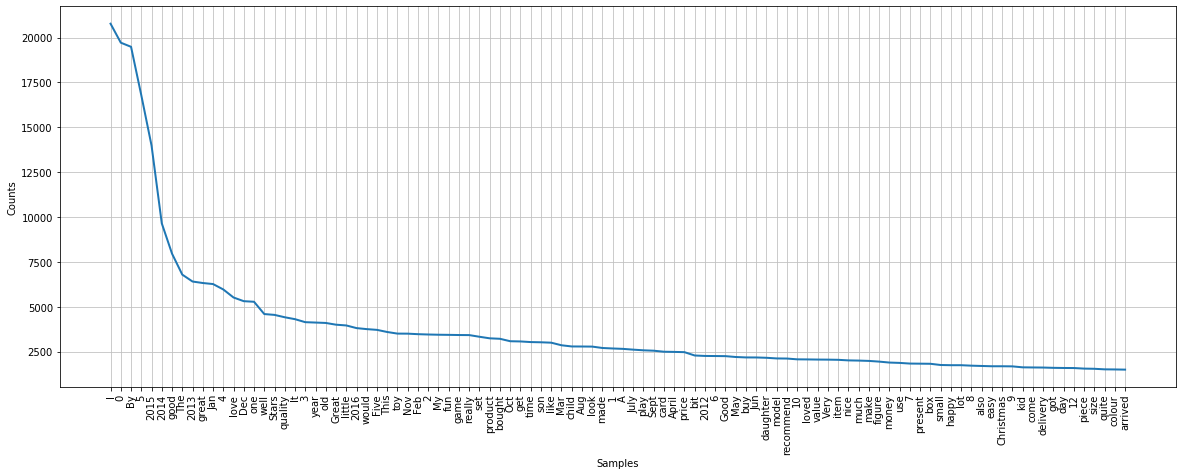

In [60]:
plot_freq_dist(res2,num_words=100)

In [61]:
import matplotlib.pyplot as plt

In [62]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(stop_words="english",analyzer='word')
x=tfidf.fit_transform(df3["nlpreview"])
print(x)

  (0, 28980)	0.044612706870094165
  (0, 23819)	0.04901933141704899
  (0, 23435)	0.06391503197547456
  (0, 5011)	0.10051926633440356
  (0, 17133)	0.06811525985124696
  (0, 14448)	0.09623684544088708
  (0, 28340)	0.061297448500965517
  (0, 27688)	0.10051926633440356
  (0, 15131)	0.07059557677949531
  (0, 8002)	0.06836378306996341
  (0, 21112)	0.06448380839734681
  (0, 23254)	0.03160353775805151
  (0, 6082)	0.03210298556839899
  (0, 12186)	0.05450479916253034
  (0, 15230)	0.09319841946261775
  (0, 10816)	0.049397839667402375
  (0, 18587)	0.06575516068998688
  (0, 349)	0.07572875765648772
  (0, 5468)	0.09623684544088708
  (0, 3074)	0.07342891379961841
  (0, 7997)	0.05745333736865044
  (0, 8126)	0.11066973903435103
  (0, 20671)	0.05730126497144396
  (0, 22483)	0.11933643982740723
  (0, 12743)	0.14854860965105937
  :	:
  (9999, 29916)	0.09479491465760219
  (9999, 18003)	0.020686650819118853
  (9999, 28305)	0.0710874769721806
  (9999, 21193)	0.03949179660776912
  (9999, 42)	0.0494896572399763

In [63]:
print(x.shape)

(10000, 33363)


In [64]:
pav=[]
for j in range(1,10):
  kmeans=KMeans(n_clusters=j,max_iter=200,n_init=1)
  kmeans.fit(x)
  pav.append(kmeans.score(x))

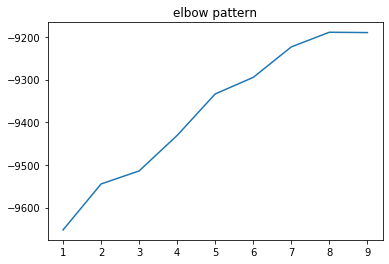

In [65]:
plt.plot(range(1,10),pav)
plt.title('elbow pattern')
plt.show()

In [66]:
km=KMeans(n_clusters=6,max_iter=200,n_init=1)
km.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=200,
       n_clusters=6, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [80]:
km.labels_

array([0, 2, 2, ..., 1, 1, 1])

In [93]:
sorted(df3["nlpreview"])

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '1 Kilo Rhomboid Mix Memory Foam Chips great everything need cushioning I used product make bed elderly Labrador Arthritis comfortable heat body mould memory foam shape lie support joint I also used product make pillow use car sits small back preventing usual back ache I used get commuting I also used product floor cushion recently dog fell back seat car husband brake suddenly avoid box road fell got wedged space Seats I measured space foot well made cushion block gap extend back seat width travel Vets comfort hydrotherapy session She cannot wear car harness anymore benign fatty lump harness sat back wear one device clip onto collar one end clip seat belt also available Amazon Also happy recommend product awful smell either Five Stars 5 0 21 Mar 2015 By Mr R Gilbertson Ricky 21 Mar 2015 Great',
 '10 10',
 '10 10',
 '10 10 worth money wait I reccomend buying spare incase break',
 '10 minute defuse tonne bomb ship blow Well What game What boil rol

In [95]:
pavan=sorted(km.labels_)
count=0
coun=0
cou=0
co=0
c=0
m=0
for i in pavan:
    if i==0:
        count+=1
    elif i==1:
        coun+=1
    elif i==2:
        cou+=1
    elif i==3:
        co+=1
    elif i==4:
        c+=1
    elif i==5:
        m+=1
print(count)
print(coun)
print(cou)
print(co)
print(c)
print(m)
        

2471
4421
2120
244
205
539


In [145]:
#cluster 1 words are
mansoor=sorted(df3["nlpreview"])[0:2471]
baava=sorted(df3["nlpreview"])[2471:6892]
siva=sorted(df3["nlpreview"])[6892:9012]
shammir=sorted(df3["nlpreview"])[9012:9256]
eswar=sorted(df3["nlpreview"])[9256:9461]
akhila=sorted(df3["nlpreview"])[9461:10000]
chandini=" ".join([narendra for narendra in mansoor ])
afreed=" ".join([sunny for sunny in baava])
santhi=" ".join([rishika for rishika in siva])
mad=" ".join([srk for srk in shammir])
bharath=" ".join([bhanu for bhanu in eswar])
nithin=" ".join([jagadeesh for jagadeesh in akhila])

In [139]:
from wordcloud import WordCloud
def plotwordcloud(word):
  wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(word) 
  plt.figure(figsize=(10, 7)) 
  plt.imshow(wordcloud, interpolation="bilinear")
  plt.axis('off') 
  plt.show()

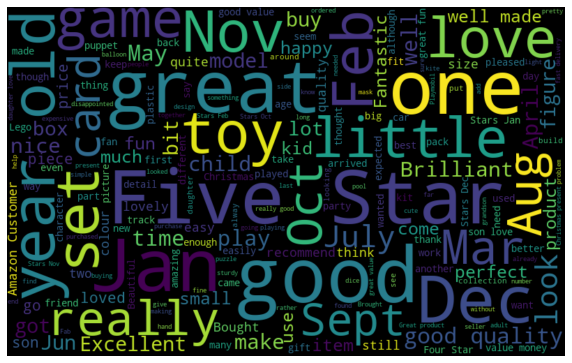

In [140]:
plotwordcloud(chandini)

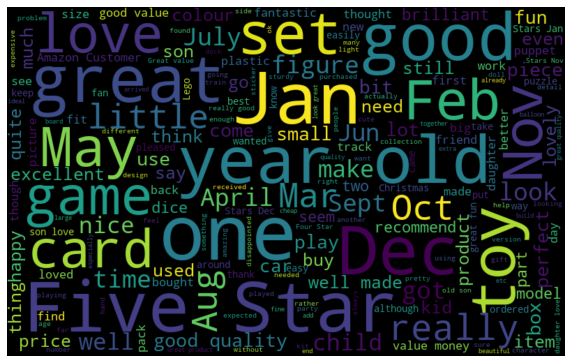

In [141]:
plotwordcloud(afreed)

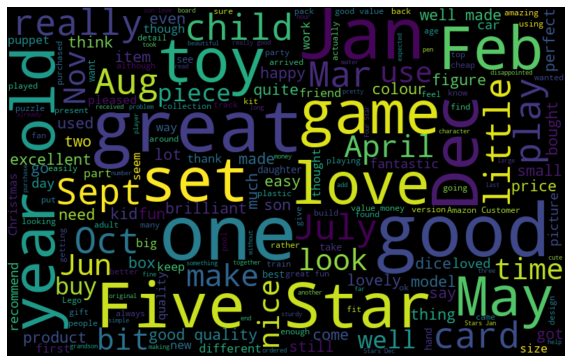

In [123]:
plotwordcloud(santhi)

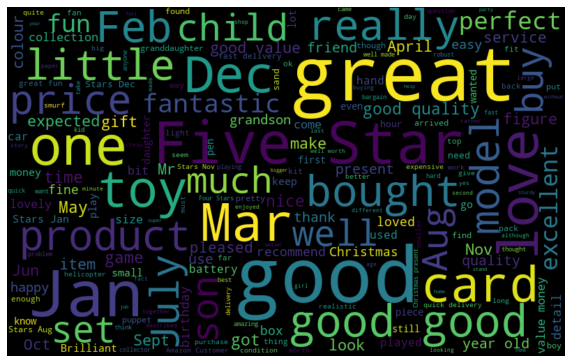

In [142]:
plotwordcloud(mad)

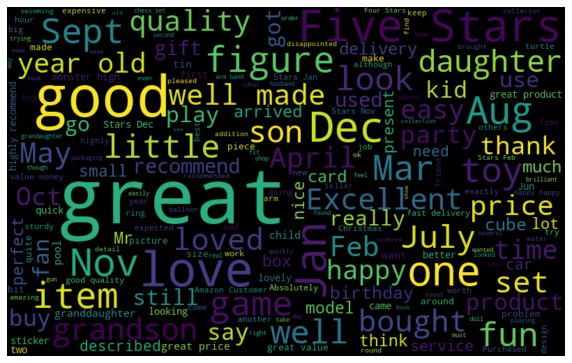

In [143]:
plotwordcloud(bharath)

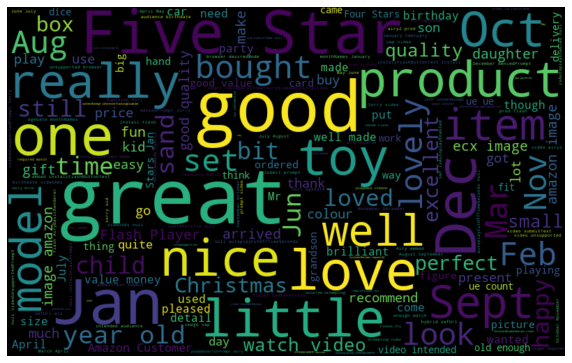

In [146]:
plotwordcloud(nithin)